In [1]:
#pip install pandas openpyxl geopandas matplotlib

import os
import pandas as pd
import geopandas as gpd
import matplotlib.pyplot as plt

C:\Users\trine\AppData\Local\Temp\ipykernel_68796\3914146270.py:4: DeprecationWarning: 
Pyarrow will become a required dependency of pandas in the next major release of pandas (pandas 3.0),
(to allow more performant data types, such as the Arrow string type, and better interoperability with other libraries)
but was not found to be installed on your system.
If this would cause problems for you,
please provide us feedback at https://github.com/pandas-dev/pandas/issues/54466
        
  import pandas as pd


In [4]:

dc_df = gpd.read_file(os.path.join("..", "out", "datacenters_usa.geojson"))

# Remove inplace=True
dc_df.drop(['postal', 'link_profile'], axis=1, inplace=True)

mask = dc_df['country'] == 'USA'

dc_df = dc_df[mask]

# # Create a GeoDataFrame
dc_gdf = gpd.GeoDataFrame(dc_df, geometry=gpd.points_from_xy(dc_df.longitude, dc_df.latitude))

# Define or identify the coordinate reference system (CRS)
# For the United States, you can use EPSG:4326 (WGS 84) which is commonly used for latitude and longitude coordinates
dc_gdf.crs = "EPSG:4326"

states_map = gpd.read_file(os.path.join("..", "data", "States_shapefile-shp", "States_shapefile.shp"))


states_map.head()


,FID,Program,State_Code,State_Name,Flowing_St,FID_1,geometry
0,1,PERMIT TRACKING,AL,ALABAMA,F,919,"POLYGON ((-85.07007 31.98070, -85.11515 31.907..."
1,2,None,AK,ALASKA,N,920,"MULTIPOLYGON (((-161.33379 58.73325, -161.3824..."
2,3,AZURITE,AZ,ARIZONA,F,921,"POLYGON ((-114.52063 33.02771, -114.55909 33.0..."
3,4,PDS,AR,ARKANSAS,F,922,"POLYGON ((-94.46169 34.19677, -94.45262 34.508..."
4,5,None,CA,CALIFORNIA,N,923,"MULTIPOLYGON (((-121.66522 38.16929, -121.7823..."


In [5]:
power_df = pd.read_excel(os.path.join("..", "data", "avgprice_annual.xlsx"), skiprows=1)

#only keeping power prices from 2020
power_df = power_df[power_df['Year'] == 2020]

#only keeping "total electric industry" as the industry sector as its the only one that has all 51 states.
power_df = power_df[power_df['Industry Sector Category'] == 'Total Electric Industry']

print(power_df)


    Year State Industry Sector Category  Residential  Commercial  Industrial  \
0   2020    AK  Total Electric Industry        22.57       19.58       15.88   
1   2020    AL  Total Electric Industry        12.58       11.55        5.87   
2   2020    AR  Total Electric Industry        10.41        8.61        5.89   
3   2020    AZ  Total Electric Industry        12.27       10.11        6.07   
4   2020    CA  Total Electric Industry        20.45       17.53       14.27   
5   2020    CO  Total Electric Industry        12.36       10.29        7.48   
6   2020    CT  Total Electric Industry        22.71       16.58       13.07   
7   2020    DC  Total Electric Industry        12.63       11.85        7.99   
8   2020    DE  Total Electric Industry        12.56        9.18        6.70   
9   2020    FL  Total Electric Industry        11.27        8.85        7.15   
10  2020    GA  Total Electric Industry        12.02       10.08        5.77   
11  2020    HI  Total Electric Industry 

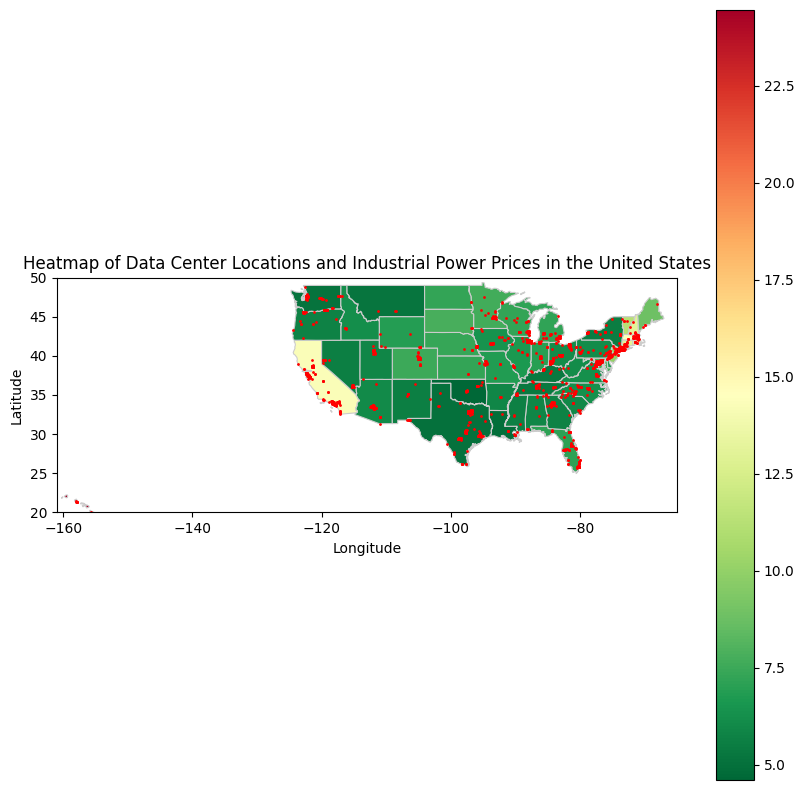

In [9]:
merged_data = states_map.merge(power_df, how='left', left_on='State_Code', right_on='State')

power_sector = 'Industrial'

# Plot the custom map
fig, ax = plt.subplots(figsize=(10, 10))
merged_data.plot(column=power_sector, cmap='RdYlGn_r', linewidth=0.8, ax=ax, edgecolor='0.8', legend=True)

# Plot the data points on the map
dc_gdf.plot(ax=ax, color='red', markersize=1)

# Set the extent of the plot to focus on the United States

#ax.set_xlim(-180, -65)  # Adjust these values based on your preference

ax.set_xlim(-161, -65)  # Adjust these values based on your preference

#ax.set_xlim(-130, -65)  # Adjust these values based on your preference
ax.set_ylim(20, 50)     # Adjust these values based on your preference

plt.title(f'Heatmap of Data Center Locations and {power_sector} Power Prices in the United States')
plt.xlabel('Longitude')
plt.ylabel('Latitude')
plt.show()

In [10]:
print(states_map.columns)
print(dc_df.columns)

Index(['FID', 'Program', 'State_Code', 'State_Name', 'Flowing_St', 'FID_1',
       'geometry'],
      dtype='object')
Index(['name', 'id', 'latitude', 'longitude', 'address', 'city', 'state',
       'country', 'geometry'],
      dtype='object')


In [12]:
def uppercase_df(input_df):
    return input_df.map(lambda x: x.upper() if isinstance(x, str) else x)

In [13]:
state_counts = dc_df['state'].value_counts().reset_index()
# Convert all string values in the dataframe to uppercase since the shapefile uses uppercase state names
state_counts = uppercase_df(state_counts)
state_counts.columns = ['State_Name', 'Datacenter_Count']
state_counts



,State_Name,Datacenter_Count
0,VIRGINIA,311
1,CALIFORNIA,258
2,TEXAS,241
3,OHIO,150
4,NEW YORK,128
5,ILLINOIS,123
6,FLORIDA,119
7,OREGON,105
8,WASHINGTON,82
9,GEORGIA,75


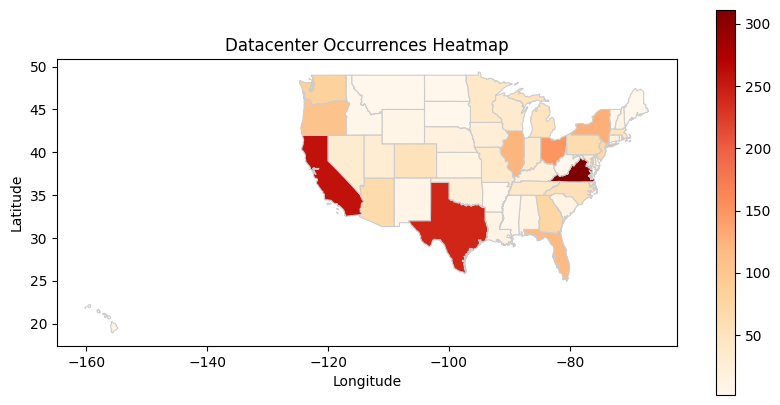

In [14]:
# Merge the state counts with the state shapefile map based on state names
merged_data2 = states_map.merge(state_counts, how='left', on='State_Name')

# Plot the map with state occurrences heatmap
fig, ax = plt.subplots(figsize=(10, 5))
merged_data2.plot(column='Datacenter_Count', cmap='OrRd', linewidth=0.8, ax=ax, edgecolor='0.8', legend=True)

plt.title('Datacenter Occurrences Heatmap')
plt.xlabel('Longitude')
plt.ylabel('Latitude')
plt.show()

In [20]:
internet_df = pd.read_csv(os.path.join("..", "data", "average-internet-speed-by-state-2024.csv"))

internet_df = uppercase_df(internet_df)

internet_df.rename(columns={'state': 'State_Name'}, inplace=True)

merged_data3 = states_map.merge(internet_df, how='left', on='State_Name')


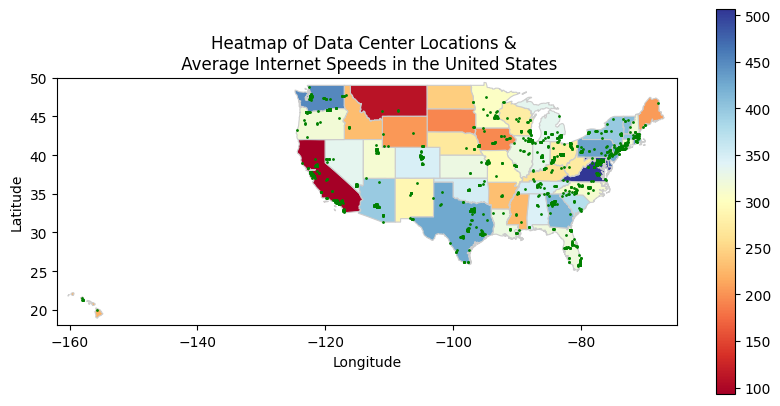

In [21]:
# Plot the custom map
fig, ax = plt.subplots(figsize=(10, 5))
merged_data3.plot(column='AverageInternetSpeedMbps', cmap='RdYlBu', linewidth=0.8, ax=ax, edgecolor='0.8', legend=True)

# Plot the data points on the map
dc_gdf.plot(ax=ax, color='green', markersize=1)

# Set the extent of the plot to focus on the United States

#ax.set_xlim(-180, -65)  # Adjust these values based on your preference

ax.set_xlim(-162, -65)  # Adjust these values based on your preference

#ax.set_xlim(-130, -65)  # Adjust these values based on your preference
ax.set_ylim(18, 50)     # Adjust these values based on your preference

plt.title('Heatmap of Data Center Locations & \n Average Internet Speeds in the United States')
plt.xlabel('Longitude')
plt.ylabel('Latitude')
plt.show()